In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , accuracy_score

In [2]:
#Import dataset
ds=pd.read_csv("dataset_website.csv")
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
#Analaysing the data using pandas and checking if the dataset contains any Null values

ds.info()
ds.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [4]:
x=ds.iloc[:,1:31].values
y=ds.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

MODEL BUILDING

In [7]:
from sklearn.metrics import accuracy_score, classification_report


In [9]:
from sklearn.tree import DecisionTreeClassifier

ds=DecisionTreeClassifier()

ds.fit(x_train,y_train)
prediction_ds = ds.predict(x_test)

accuracy_ds = accuracy_score(y_test,prediction_ds)*100
scores_dict = {}

In [10]:
print('Accuracy score : ',accuracy_ds)
scores_dict['DecisionTreeClassifier'] = accuracy_ds
print(classification_report(y_test,prediction_ds))

Accuracy score :  96.33649932157394
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1014
           1       0.96      0.98      0.97      1197

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [11]:
ds.feature_importances_

array([0.00680642, 0.00867844, 0.00288819, 0.00256684, 0.00261124,
       0.01961747, 0.03064704, 0.62671122, 0.01668993, 0.00459877,
       0.00083075, 0.003533  , 0.01049042, 0.10810492, 0.03352939,
       0.00977623, 0.00696326, 0.00225578, 0.00396117, 0.00240658,
       0.00159801, 0.00231627, 0.00125276, 0.01578368, 0.00931846,
       0.02856246, 0.00451757, 0.01020192, 0.01930682, 0.003475  ])

In [12]:
# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_test,y_pred1)*100
log_reg

91.67797376752601

In [15]:
scores_dict['LogisticRegression'] = log_reg

In [18]:
import seaborn as sns

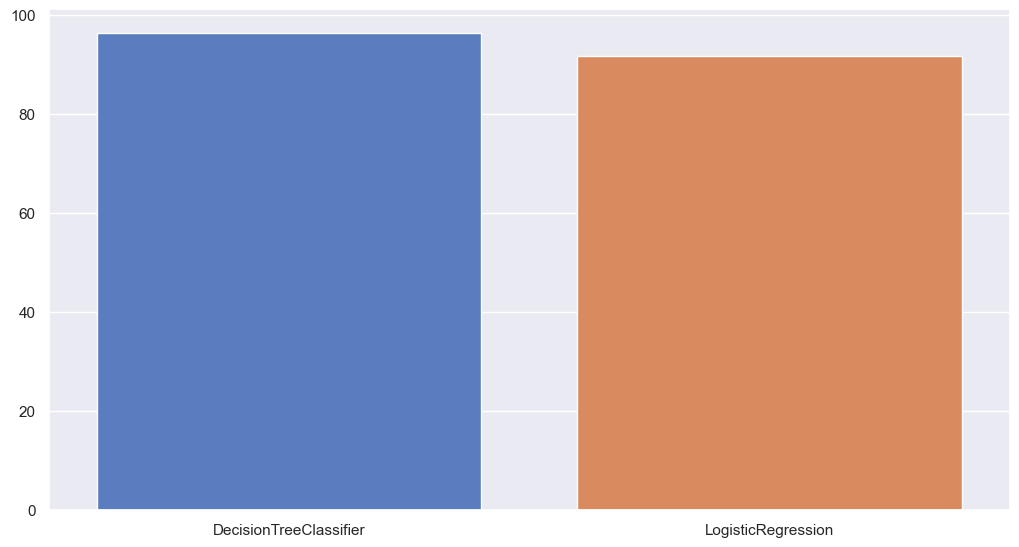

In [19]:
algo_name = list(scores_dict.keys())
accuracy_list = list(scores_dict.values())

sns.set(rc={'figure.figsize':(12.4,6.5)})
with sns.color_palette('muted'):
    sns.barplot(x=algo_name,y=accuracy_list)

In [20]:
import pickle
pickle.dump(lr,open('phishing_Website.pkl','wb'))